## Ejercicios gestión de nulos

Instrucciones:

- Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

- Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

- Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

- Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

Nota: Puedes utilizar cualquier método o estrategia de imputación que consideres adecuado para los datos y discutir las ventajas y desventajas de tu elección en el informe.

In [ ]:
#pip install scikit-learn
#pip install seaborn
#pip install matplotlib

In [6]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [19]:
df = pd.read_csv("files/world_data_full_apply.csv", index_col=0)
df.head(10)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
5,Antigua and Barbuda,223.0,AG,20.5,443.000,0.0,15.33,1.0,"St. John's, Saint John",557.000,113.81,1.2,XCD,1.99,22.3,0.99,1.727759e+09,105.0,24.8,5.0,"St. John's, Saint John",76.9,42.0,3.04,English,24.3,2.76,97.118,NaN,16.5,43.0,NaN,23.800,17.060816,-61.796428,Central America
6,Argentina,17.0,AR,54.3,NaN,105.0,17.02,54.0,Buenos Aires,201.348,232.75,53.5,ARS,2.26,9.8,1.10,4.496634e+11,109.7,90.0,8.8,Buenos Aires,76.5,39.0,3.35,Spanish,17.6,3.96,NaN,61.3,10.1,106.3,9.79,NaN,-38.416097,-63.616672,South America
7,Armenia,104.0,AM,58.9,29.743,49.0,13.99,374.0,Yerevan,5.156,129.18,1.4,AMD,1.76,11.7,0.77,1.367280e+10,92.7,54.6,11.0,Yerevan,74.9,26.0,0.66,Armenian,81.6,4.40,NaN,55.6,20.9,22.6,16.99,NaN,40.069099,45.038189,Asia
8,Australia,3.0,AU,48.2,NaN,58.0,12.60,61.0,Canberra,375.908,119.80,1.6,AUD,1.74,16.3,0.93,1.392681e+12,100.3,113.1,3.1,Sydney,82.7,6.0,13.59,NaN,19.6,3.68,NaN,65.5,23.0,47.4,5.27,NaN,-25.274398,133.775136,Oceania
9,Austria,109.0,AT,32.4,83.871,21.0,9.70,43.0,Vienna,61.448,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,Vienna,81.6,5.0,NaN,German,17.9,5.17,NaN,60.7,25.4,51.4,4.67,NaN,47.516231,14.550072,Europe


In [14]:
#Calcular el porcentaje de nulos que tenemos para cada columna: 
porcentaje_nulos = (df.isnull().sum() / df.shape[0]) * 100
porcentaje_nulos

country                                  0.000000
density                                  0.000000
abbreviation                             3.589744
agricultural_land                        3.589744
land_area                               15.384615
armed_forces_size                       14.871795
birth_rate                               3.076923
calling_code                             0.512821
capital/major_city                       1.538462
co2-emissions                            6.153846
cpi                                     10.256410
cpi_change                               8.205128
currency-code                            7.692308
fertility_rate                           3.589744
forested_area                            3.589744
gasoline_price                          10.256410
gdp                                      1.025641
gross_primary_education_enrollment       3.589744
gross_tertiary_education_enrollment      6.153846
infant_mortality                         3.076923


In [16]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porcentaje_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
abbreviation,3.589744
agricultural_land,3.589744
land_area,15.384615
armed_forces_size,14.871795
birth_rate,3.076923
calling_code,0.512821
capital/major_city,1.538462
co2-emissions,6.153846
cpi,10.256410
cpi_change,8.205128


### Columnas categóricas: 

In [17]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_categoricas = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_categoricas)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capital/major_city', 'currency-code', 'largest_city',
       'official_language', 'continent'],
      dtype='object')


In [18]:
for col in nulos_categoricas:
    print(f"La distribución de las categorías para la columna {col}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna abbreviation


abbreviation
AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna capital/major_city


capital/major_city
Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: count, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna currency-code


currency-code
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: count, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna largest_city


largest_city
S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna official_language


official_language
English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: count, Length: 76, dtype: float64

........................
La distribución de las categorías para la columna continent


continent
Africa             0.271795
Europe             0.241026
Asia               0.230769
Central America    0.102564
Oceania            0.071795
South America      0.066667
North America      0.010256
Name: count, dtype: float64

........................


### 

- abbreviation: no hay dominante, reemplazamos por 'unknown'
- capital/major_city: no hay dominante, reemplazamos por 'unknown'
- currency-code: podemos reemplazar por la moda (EUR) o 'unknown'
- largest_city: reemplazamos por 'unknown'
- official_language: hay dos dominantes (eng - french), reemplazamos por 'unknown'
- continent: hay 3 dominantes, reemplazamos por 'unknown'

-------


In [22]:
columnas_unknown = ['abbreviation', 'capital/major_city', 'largest_city', 'official_language', 'continent']
columna_moda = 'currency-code'

In [23]:
## Reemplazamos columnas moda: 

moda = df['currency-code'].mode()[0]
df['currency-code'] = df['currency-code'].fillna(moda)

In [24]:
df['currency-code'].isnull().sum()

0

In [ ]:
## Reemplazamos columna unknown:

for col in columnas_unknown: 

    df[col] = df[col].fillna("Unknown")

In [27]:
df[columnas_unknown].isnull().sum()

abbreviation          0
capital/major_city    0
largest_city          0
official_language     0
continent             0
dtype: int64

### Columnas numéricas

In [28]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_numericas = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_numericas)

Las columnas numéricas que tienen nulos son : 
 
Index(['agricultural_land', 'land_area', 'armed_forces_size', 'birth_rate',
       'calling_code', 'co2-emissions', 'cpi', 'cpi_change', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')


In [32]:
#calcular el número de nulos que tenemos en cada una de las columnas numericas
df[nulos_numericas].isnull().sum() / df.shape[0]

agricultural_land                       0.035897
land_area                               0.153846
armed_forces_size                       0.148718
birth_rate                              0.030769
calling_code                            0.005128
co2-emissions                           0.061538
cpi                                     0.102564
cpi_change                              0.082051
fertility_rate                          0.035897
forested_area                           0.035897
gasoline_price                          0.102564
gdp                                     0.010256
gross_primary_education_enrollment      0.035897
gross_tertiary_education_enrollment     0.061538
infant_mortality                        0.030769
life_expectancy                         0.041026
maternal_mortality_ratio                0.071795
minimum_wage                            0.230769
out_of_pocket_health_expenditure        0.035897
physicians_per_thousand                 0.035897
population          

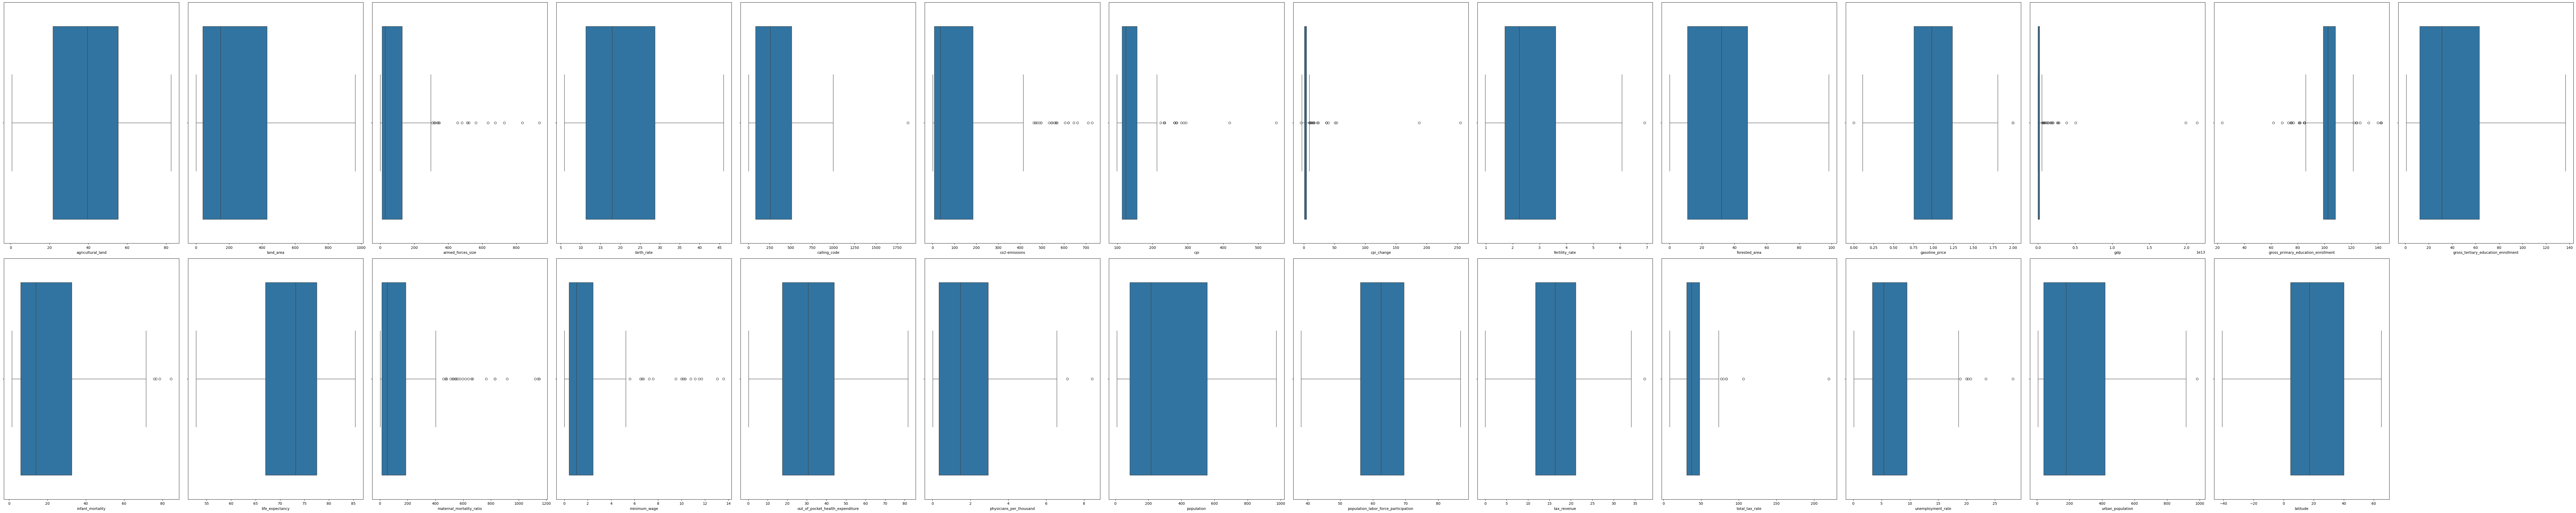

In [44]:
fig, axes = plt.subplots(nrows = 2, ncols = 14, figsize = (100,20)) 

axes = axes.flat

for indice, col in enumerate(nulos_numericas):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

- agricultural_land: no hay atipicos, reemplazar por media o mediana. 
- land_area: no hay atipicos, reemplazar por media o mediana. 
- armed_forced_size: varios atipicos, utilizar KNNImputer o InterativeImputer
- birth_rate: no hay atipicos, reemplazar por media o mediana. 
- calling_code: hay un atipico, pero no reemplazamos (es un código de teléfono de cada país)
- co2-emissions: varios atipicos, utilizar KNNImputer o InterativeImputer
- cpi: valores atipicos, podemos probar con ambos metodos y ver cual queda mejor
- cpi change: similar al anterior, pero la media es mas fina. 
- fertility_rate: solo hay un atipico, se puede sustituir por la mediana. 
- forested_area: no hay atipicos, reemplazar por media o mediana.
- gasoline_price: se puede sustituir por la mediana. 
- gbp: tiene varios atipicos,  utilizar KNNImputer o InterativeImputer o dejar vacio
- gross_primary_education_enrollement: tiene varios atipicos,  utilizar KNNImputer o InterativeImputer o dejar vacio
- gross_terciary_education_enrollement: no tiene atipicos, reemplazar por media o mediana. 
- infant_mortality: 




In [50]:
df.head(4)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe


In [52]:
df['cpi'].value_counts()

cpi
110.62    2
99.55     2
106.58    2
115.38    1
114.11    1
         ..
112.85    1
268.36    1
101.87    1
107.43    1
105.51    1
Name: count, Length: 172, dtype: int64